In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("placement.csv")

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [5]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [7]:
# Preprocess
df = df.iloc[:,1:]

In [9]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [10]:
import matplotlib.pyplot as plt

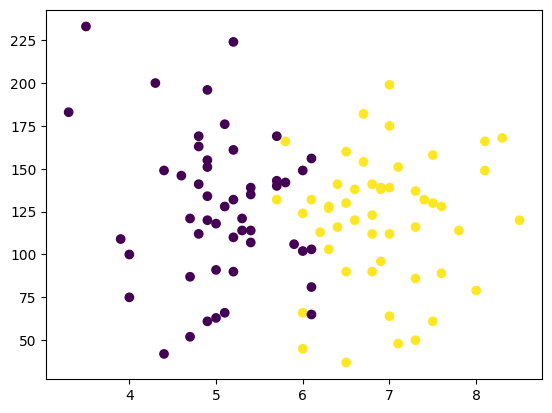

In [14]:
# EDA
plt.scatter(df['cgpa'], df["iq"], c=df['placement'])

In [15]:
# Extract input and output cols
X, y = df.iloc[:, 0:2], df.iloc[:,-1]

In [18]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [20]:
y.shape

(100,)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1)

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

In [38]:
# Scale the values
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[-0.87281802, -1.64076018],
       [ 1.42976842,  0.08464824],
       [-0.2528909 ,  1.17298279],
       [ 0.01279215, -0.02153074],
       [-0.96137904,  0.69517738],
       [-0.87281802, -0.18079921],
       [ 0.54415825, -0.12770972],
       [ 0.2784752 ,  0.08464824],
       [ 1.25264638,  0.19082722],
       [-1.13850107, -1.0036863 ],
       [ 0.72128028,  0.42972993],
       [-2.37835531,  1.54460922],
       [ 0.10135316, -1.16295477],
       [ 0.36703621,  0.42972993],
       [-0.69569599,  0.96062483],
       [-1.75842819, -1.32222324],
       [ 0.10135316,  0.8279011 ],
       [-1.13850107, -0.10116497],
       [ 1.8725735 ,  1.09334855],
       [ 0.10135316, -1.58767069],
       [-1.04994006,  0.42972993],
       [-0.78425701,  1.358796  ],
       [-0.51857395, -0.4727914 ],
       [ 0.98696333,  0.69517738],
       [ 0.72128028, -0.04807548],
       [-0.51857395, -0.28697819],
       [ 0.01279215,  0.64208789],
       [ 0.89840232, -1.61421544],
       [ 1.3412074 ,

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
clf = LogisticRegression()

In [43]:
# Train the model
clf.fit(X_train, y_train)

LogisticRegression()

In [46]:
# Evaluate the model/model selection
y_pred = clf.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test, y_pred)

1.0

In [51]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot: >

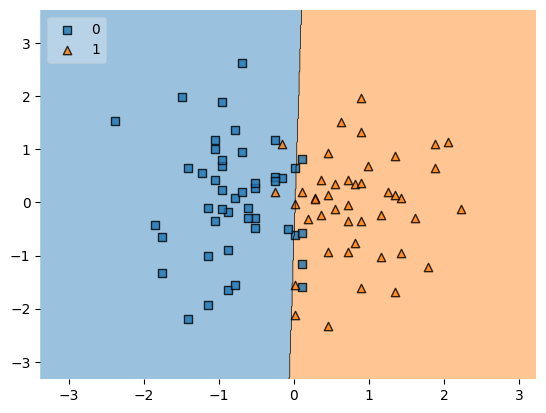

In [52]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [54]:
import pickle
pickle.dump(clf, open('model.pkl', 'wb'))